Import library

In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import Sastrawi
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'Sastrawi'

Import data

In [ ]:
file_dataset = 'lazada-reviews.csv'
df = pd.read_csv(file_dataset)

df = df[['category','itemId','reviewContent','rating']]
df = df.dropna(subset=['reviewContent'])
df

,category,itemId,reviewContent,rating
0,beli-harddisk-eksternal,100002528,bagus mantap dah sesui pesanan,5
1,beli-harddisk-eksternal,100002528,"Bagus, sesuai foto",4
2,beli-harddisk-eksternal,100002528,okkkkk mantaaaaaaapppp ... goood,5
3,beli-harddisk-eksternal,100002528,bagus sesuai,4
7,beli-harddisk-eksternal,100002528,bima,1
...,...,...,...,...
203780,shop-televisi-digital,9467887,Wkwkwk,5
203781,shop-televisi-digital,9467898,seller incapable to keep his product page clea...,1
203782,shop-televisi-digital,9467899,barang bagus dengan harga kompetitif,5
203785,shop-televisi-digital,9548767,Ok.thank lazada Pagi order sore barang nyampe ...,3


In [ ]:
df['rating'].value_counts().sort_values(ascending=True)

2     2184
3     4372
1     6951
4    10626
5    82896
Name: rating, dtype: int64

In [ ]:
plot=df.rating.value_counts()
px.bar(plot,color=plot.index,color_continuous_scale=px.colors.sequential.Viridis)

In [ ]:
print("Summary statistics of numerical features : \n", df.describe())

print("=======================================================================")

Summary statistics of numerical features : 
              itemId         rating
count  1.070290e+05  107029.000000
mean   2.791076e+08       4.498024
std    1.686437e+08       1.110621
min    6.070000e+03       1.000000
25%    1.600208e+08       5.000000
50%    3.536856e+08       5.000000
75%    3.924827e+08       5.000000
max    7.242170e+08       5.000000


In [ ]:
print("\nTotal number of reviews: ",len(df))

print("=======================================================================")

print("\nTotal number of category: ", len(list(set(df['category']))))

print("=======================================================================")

print("\nTotal number of unique products: ", len(list(set(df['itemId']))))

print("=======================================================================")


Total number of reviews:  107029

Total number of category:  5

Total number of unique products:  3293


In [ ]:
print("\nPercentage of reviews with positive sentiment : {:.2f}%"\
      .format(df[df['rating']>=4]["reviewContent"].count()/len(df)*100))

print("=======================================================================")

print("\nPercentage of reviews with negative sentiment : {:.2f}%"\
      .format(df[df['rating']<=3]["reviewContent"].count()/len(df)*100))
print("=======================================================================")


Percentage of reviews with positive sentiment : 87.38%

Percentage of reviews with negative sentiment : 12.62%


In [ ]:
label=[]
for index, row in df.iterrows():
    if row['rating']>=4:
        label.append(1)
    else:
        label.append(0)

df['label']=label
df=df.drop(columns='rating', axis=1)
df

,category,itemId,reviewContent,label
0,beli-harddisk-eksternal,100002528,bagus mantap dah sesui pesanan,1
1,beli-harddisk-eksternal,100002528,"Bagus, sesuai foto",1
2,beli-harddisk-eksternal,100002528,okkkkk mantaaaaaaapppp ... goood,1
3,beli-harddisk-eksternal,100002528,bagus sesuai,1
7,beli-harddisk-eksternal,100002528,bima,0
...,...,...,...,...
203780,shop-televisi-digital,9467887,Wkwkwk,1
203781,shop-televisi-digital,9467898,seller incapable to keep his product page clea...,0
203782,shop-televisi-digital,9467899,barang bagus dengan harga kompetitif,1
203785,shop-televisi-digital,9548767,Ok.thank lazada Pagi order sore barang nyampe ...,0


In [ ]:
plot=df.label.value_counts()
px.bar(plot,color=plot.index,color_continuous_scale=px.colors.sequential.Cividis)

In [ ]:
# s1=df[df.label==1].sample(50000, replace=True)
# s2=df[df.label==0].sample(30000, replace=True)

# df=pd.concat([s1,s2])
print(df.shape)
print(df.label.value_counts(normalize=True))

(107029, 4)
1    0.873801
0    0.126199
Name: label, dtype: float64


Wordcloud

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

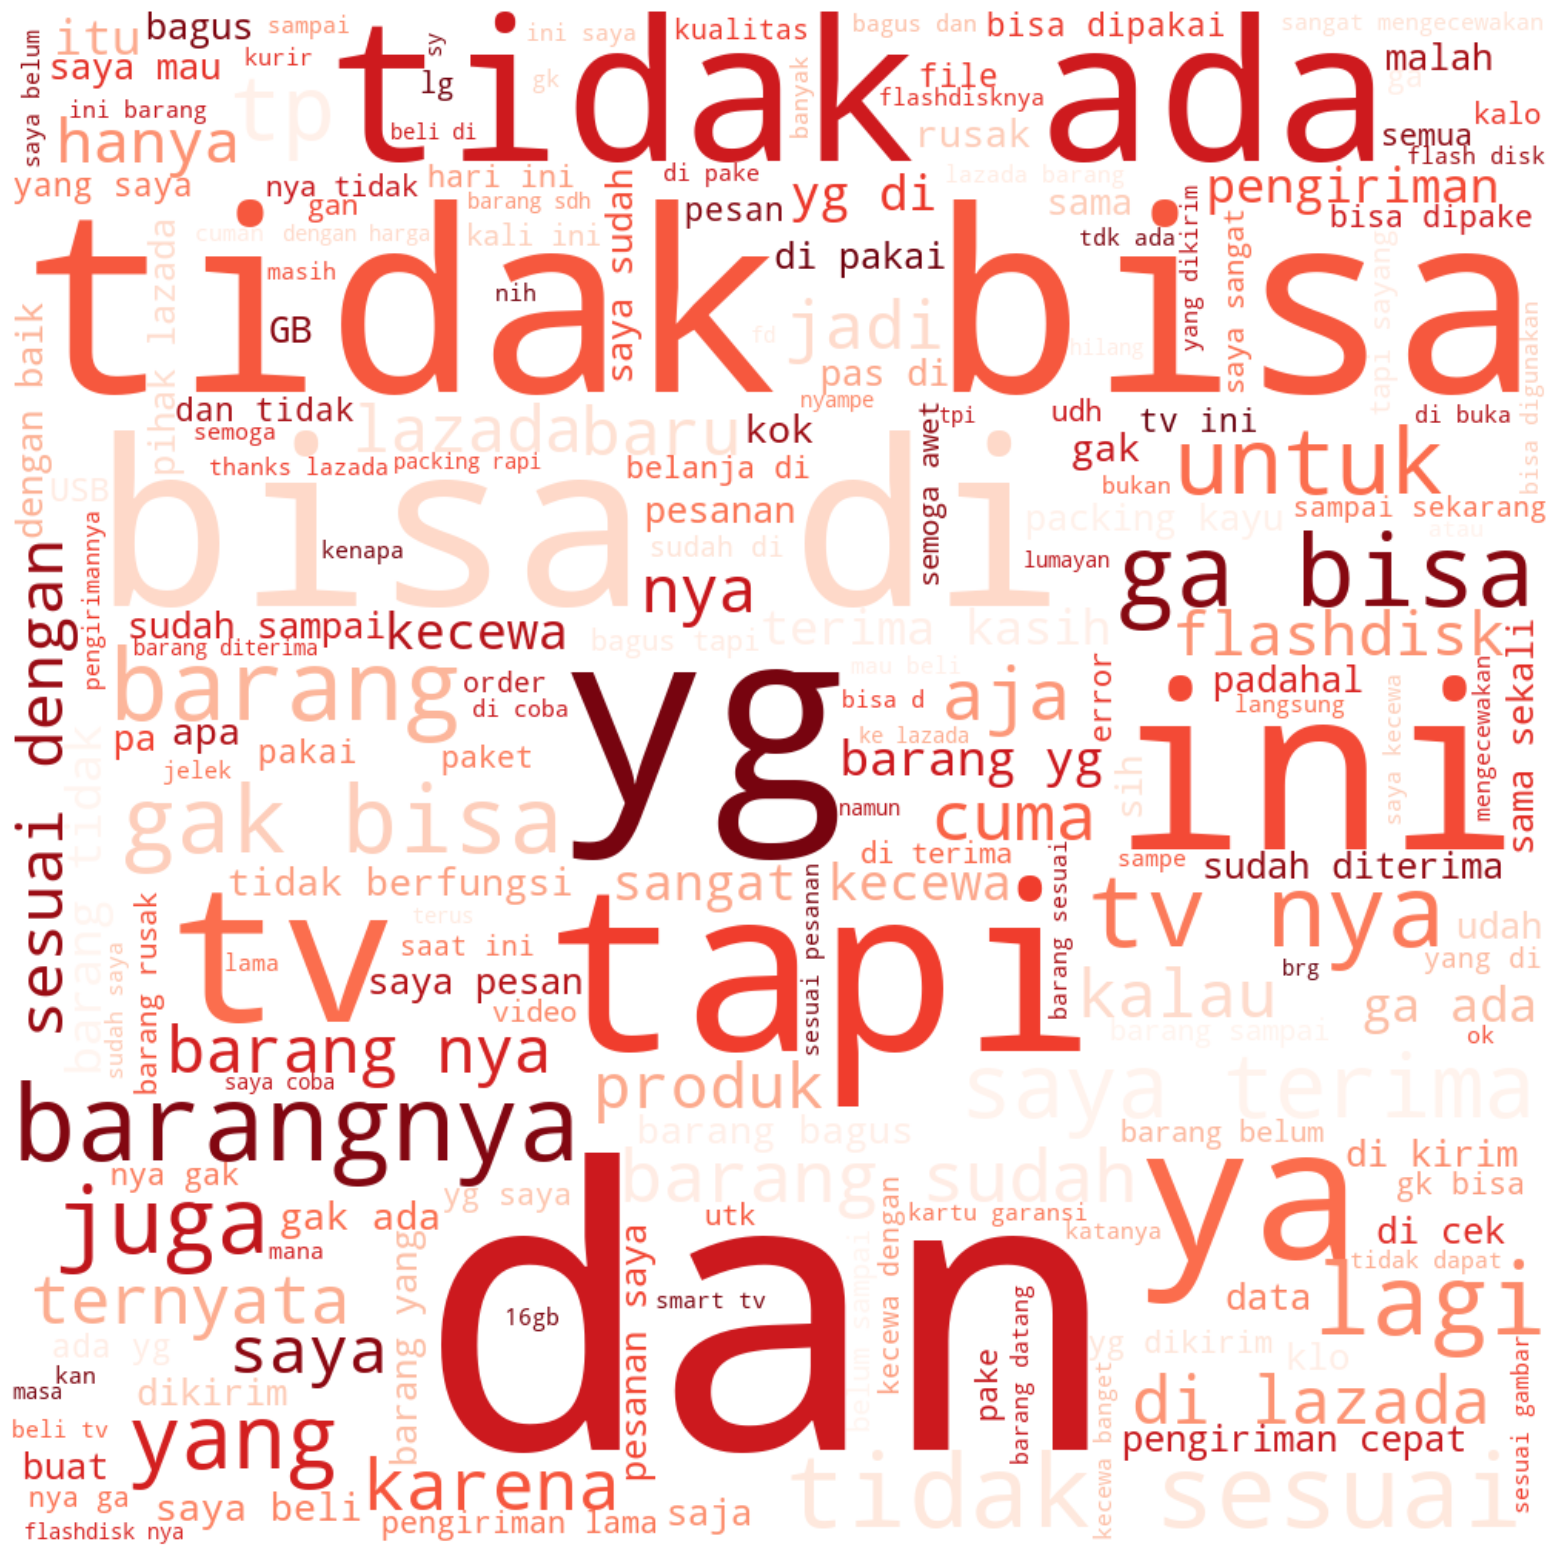

In [ ]:
#polarity = 0
trains1=df[df['label']==0]
all_text=' '.join(word for word in trains1['reviewContent'])
word_cloud=WordCloud(colormap='Reds', width=1000, height=1000,mode='RGBA',background_color='white').generate(all_text)
plt.figure(figsize=(20,20))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()

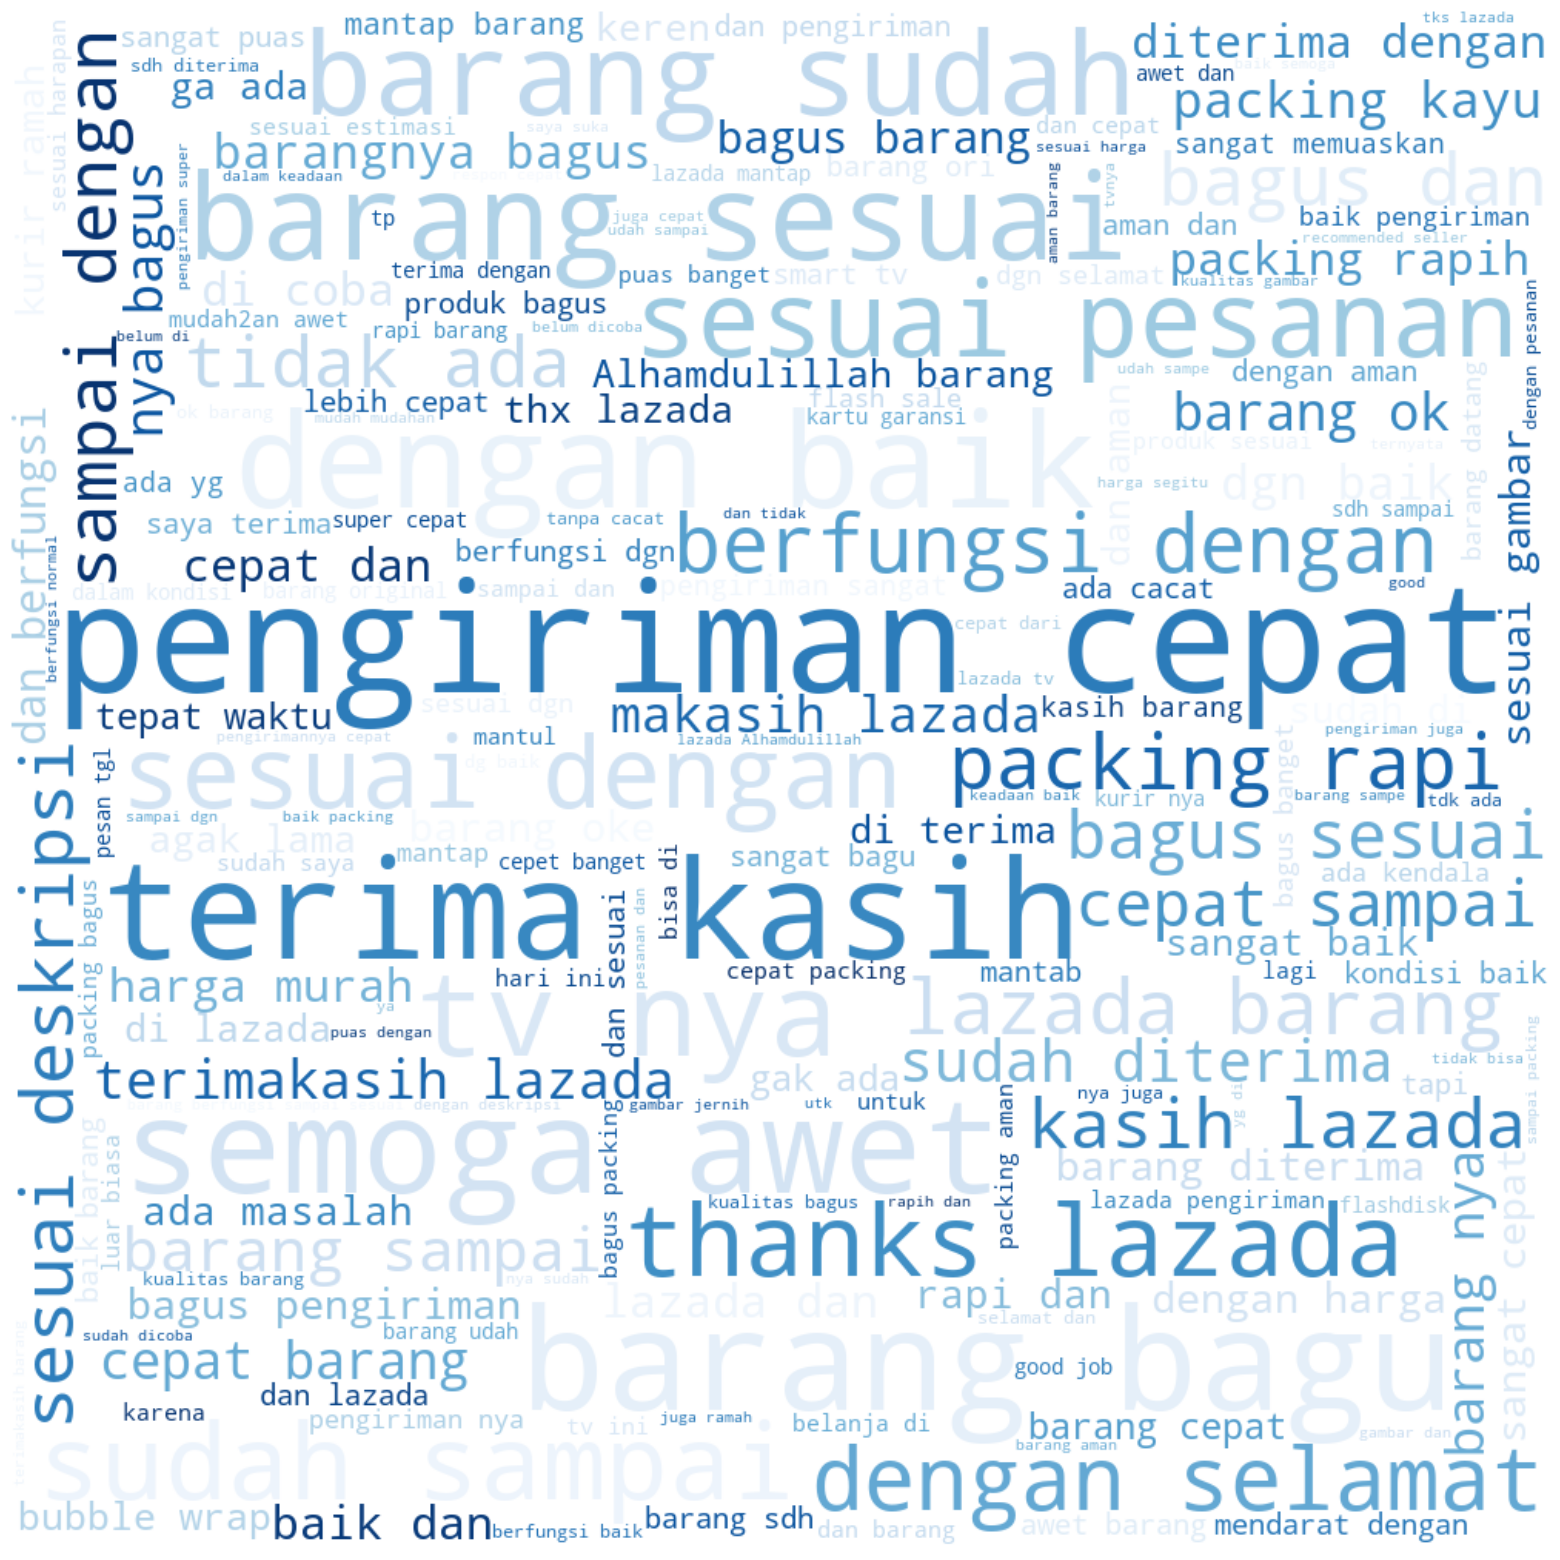

In [ ]:
#polarity = 1
trains1=df[df['label']==1]
all_text=' '.join(word for word in trains1['reviewContent'])
word_cloud=WordCloud(colormap='Blues', width=1000, height=1000,mode='RGBA',background_color='white').generate(all_text)
plt.figure(figsize=(20,20))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()

In [ ]:
import string, re

def cleansing(df):
    #lowertext
    df=df.lower()
    
    #Remove Punctuation
    remove=string.punctuation
    translator=str.maketrans(remove,' '*len(remove))
    df=df.translate(translator)
    
    #Remove ASCII & UNICODE
    df=df.encode('ascii','ignore').decode('utf-8')
    df=re.sub(r'[^\x00-\x7f]',r'', df)
    
    #Remove Newline
    df=df.replace('\n',' ')
    
    return df

In [ ]:
review = []
for index, row  in df.iterrows():
    review.append(cleansing(row['reviewContent']))

In [ ]:
review

['bagus  mantap dah sesui pesanan',
 'bagus  sesuai foto',
 'okkkkk mantaaaaaaapppp     goood',
 'bagus sesuai',
 'bima',
 'baru 10 bulan layarnya dah bergaris',
 'pesan rabu sore minggu sore sampe  barang sesuai specs mantab tks lazada',
 'mau tanya ini cicilnya pake apa ya cc bkn ',
 'apakah tv  tsb  suda ada anti gores  ',
 'pengirim barang tidak sesuai janji  katanya express 1 hari  dari hari jumat barang sampai hari rabu  semoga barangnya awet saja ',
 'kualitas ok',
 'bagaimana tv led saya merek sharp 24 hitam lc 24le170i sekarang mati total baru 2 bln kemana saya harus menghubungi dan meminta bantuan mohon kebijakan dan solusinya    so alnya masih garansi kepada pihak lazada saya mohon bantuannya terimakasih   ',
 'pengiriman super lama   tapi datang juga sich',
 'ok barang sampai dengan baik   smoga terus di pertahankan   ',
 'kalau mau cicilan gmna cra nya  ',
 'barang sudah sampai dan bagus thanks lazada',
 'pengiriman cepat sipplahhh       ',
 'sampe sekarang masih ok ne lap

Visualisasi data

In [ ]:
# plt.figure(figsize=(12,5))
# sns.countplot(df['rating'])
# df['rating'].value_counts().sort_index().plot(kind='bar')
# plt.title('Distribution of Rating')
# plt.grid()
# plt.xlabel('Rating')
# plt.ylabel('Count')
# ax = plt.axes()
# ax.set_facecolor("white")

In [ ]:
# review_length = df["reviewContent"].dropna().map(lambda x: len(x))
# plt.figure(figsize=(12,8))
# review_length.loc[review_length < 1500].hist()
# plt.title("Distribution of Review Length")
# plt.xlabel('Review length (Number of character)')
# plt.ylabel('Count')
# ax = plt.axes()
# ax.set_facecolor("white")

Data preparation

In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
 
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()
 
# Contoh
sentence = 'alhamdulillah  sampai dengan selamat   smoga awet   terima kasih lazada retail coocaa '
stop = stopword.remove(sentence)
print(stop)

alhamdulillah  dengan selamat   smoga awet   terima kasih lazada retail coocaa 


In [ ]:
review = []
for index, row in df.iterrows():
    review.append(stopword.remove(row['reviewContent']))


df['reviewContent']=review
df

,category,itemId,reviewContent,label
0,beli-harddisk-eksternal,100002528,bagus mantap dah sesui pesanan,1
1,beli-harddisk-eksternal,100002528,"Bagus, sesuai foto",1
2,beli-harddisk-eksternal,100002528,okkkkk mantaaaaaaapppp ... goood,1
3,beli-harddisk-eksternal,100002528,bagus sesuai,1
7,beli-harddisk-eksternal,100002528,bima,0
...,...,...,...,...
203780,shop-televisi-digital,9467887,Wkwkwk,1
203781,shop-televisi-digital,9467898,seller incapable to keep his product page clea...,0
203782,shop-televisi-digital,9467899,barang bagus harga kompetitif,1
203785,shop-televisi-digital,9548767,Ok.thank lazada Pagi order sore barang nyampe ...,0


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# contoh
sentence = 'packing rapi menggunakan kayu  mantap   dapet headphone'
s_clean = stemmer.stem(sentence)
 
print(s_clean)

packing rapi guna kayu mantap dapet headphone


In [ ]:
# Stemming
from tqdm import tqdm
review = []
for index, row in tqdm(df.iterrows()):
    review.append(stemmer.stem(row["reviewContent"]))
    
df['reviewContent']=review
df

107029it [1:36:02, 18.57it/s]  


,category,itemId,reviewContent,label
0,beli-harddisk-eksternal,100002528,bagus mantap dah sesui pesan,1
1,beli-harddisk-eksternal,100002528,bagus sesuai foto,1
2,beli-harddisk-eksternal,100002528,okkkkk mantaaaaaaapppp goood,1
3,beli-harddisk-eksternal,100002528,bagus sesuai,1
7,beli-harddisk-eksternal,100002528,bima,0
...,...,...,...,...
203780,shop-televisi-digital,9467887,wkwkwk,1
203781,shop-televisi-digital,9467898,seller incapable to keep his product page clea...,0
203782,shop-televisi-digital,9467899,barang bagus harga kompetitif,1
203785,shop-televisi-digital,9548767,ok thank lazada pagi order sore barang nyampe ...,0


In [ ]:
# df = df.sample(frac=0.1, random_state=0) #uncomment to use full set of data

# Drop missing values
# df.dropna(inplace=True)

# Remove any 'neutral' ratings equal to 3
# df = df[df['rating'] != 3]

# Encode 4s and 5s as 1 (positive sentiment) and 1s and 2s as 0 (negative sentiment)
# df['Sentiment'] = np.where(df['rating'] > 3, 1, 0)
# df.head()

In [ ]:
# negative = len(df[df['label']=='positive'])
# positive = len(df) - negative
# sns.countplot(df['label'])
# print('Positive reviews are {} and negative reviews are {} of total {} '.format(positive,negative,len(df)))

Train test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['reviewContent'], df['label'], \
                                                    test_size=0.2, random_state=0)

print('Load %d training examples and %d validation examples. \n' %(X_train.shape[0],X_test.shape[0]))
print('Show a review in the training set : \n', X_train.iloc[10])
X_train,y_train

Load 85623 training examples and 21406 validation examples. 

Show a review in the training set : 
 terima kasih kak tv nya dh nyampai aman dan terima kasih buat kurir mpe mlm jam tengah 9 mlm anterin ruamah


(73298     makasih coocaa barang bagus alhamdulillah ga y...
 146967                                             matapppp
 43827     speakernya cempreng ga bass nya hehe tp overal...
 160961     lumayan harga n barang jg ringan dikntong n dbwa
 175791    barang aman barang spek tulis sama segel asli ...
                                 ...                        
 40771     barang kondisi segel buka di test oke banget d...
 89160     sesuai pesan deskripsi kirim cepat fungsi baik...
 83076     laptop nya putih bersih licin jika pakai enak ...
 84822     mantul dpt hrga 10jt slash it terimakasih laza...
 128693    dari warehouse lazadanya cepat tapi kirim pos ...
 Name: reviewContent, Length: 85623, dtype: object,
 73298     1
 146967    1
 43827     1
 160961    1
 175791    1
          ..
 40771     1
 89160     1
 83076     1
 84822     1
 128693    1
 Name: label, Length: 85623, dtype: int64)

Text preprocessing

In [ ]:
# from teams.models import *
from bs4 import BeautifulSoup
# from django.conf import settings
import requests, os, string

def cleanText(raw_text, remove_stopwords=False, stemming=False, split_text=False, \
             ):
    '''
    Convert a raw review to a cleaned review
    '''
    text = BeautifulSoup(raw_text, 'html.parser').get_text()
    letters_only = re.sub("[^a-zA-Z]", " ", text)
    words = letters_only.lower().split() 
        
    if split_text==True:
        return (words)
    
    return( " ".join(words))

In [ ]:
# X_train_cleaned = []
# X_test_cleaned = []

# for d in X_train:
#     X_train_cleaned.append(cleanText(d))
# print('Show a cleaned review in the training set : \n',  X_train_cleaned[10])
    
# for d in X_test:
#     X_test_cleaned.append(cleanText(d))

LSTM

In [ ]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense , Input , LSTM , Embedding, Dropout , Activation, GRU, Flatten
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model, Sequential
from keras.layers import Convolution1D
from keras import initializers, regularizers, constraints, optimizers, layers

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix

train_df, test_df = train_test_split(df, test_size = 0.2, random_state = 42)
print("Training data size : ", train_df.shape)
print("Test data size : ", test_df.shape)

Training data size :  (85623, 4)
Test data size :  (21406, 4)


In [ ]:
top_words = 20000
tokenizer = Tokenizer(num_words=top_words)
tokenizer.fit_on_texts(train_df['reviewContent'])
list_tokenized_train = tokenizer.texts_to_sequences(train_df['reviewContent'])

max_review_length = 200
X_train = pad_sequences(list_tokenized_train, maxlen=max_review_length)
y_train = train_df['label']

In [ ]:
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words+1, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           640032    
                                                                 
 lstm (LSTM)                 (None, 100)               53200     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 693,333
Trainable params: 693,333
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
536/536 [==============================] - 525s 968ms/step - loss: 0.2634 - accuracy: 0.9012 - val_loss: 0.1985 - val_accuracy: 0.9260
Epoch 2/10
536/536 [==============================] - 539s 1s/step - loss: 0.1742 - accuracy: 0.9383 - val_loss: 0.1770 - val_accuracy: 0.9361
Epoch 3/10
536/536 [==============================] - 3068s 6s/step - loss: 0.1432 - accuracy: 0.9518 - val_loss: 0.1635 - val_accuracy: 0.9450
Epoch 4/10
536/536 [==============================] - 188s 350ms/step - loss: 0.1219 - accuracy: 0.9602 - val_loss: 0.1552 - val_accuracy: 0.9486
Epoch 5/10
536/536 [==============================] - 301s 562ms/step - loss: 0.1073 - accuracy: 0.9658 - val_loss: 0.1490 - val_accuracy: 0.9526
Epoch 6/10
536/536 [==============================] - 298s 557ms/step - loss: 0.0984 - accuracy: 0.9690 - val_loss: 0.1479 - val_accuracy: 0.9531
Epoch 7/10
536/536 [==============================] - 412s 769ms/step - loss: 0.0888 - accuracy: 0.9723 - val_loss: 0.1441 - val_

In [ ]:
list_tokenized_test = tokenizer.texts_to_sequences(test_df['reviewContent'])
X_test = pad_sequences(list_tokenized_test, maxlen=max_review_length)
y_test = test_df['label']
prediction = model.predict(X_test)
y_pred = (prediction > 0.5)
print("Accuracy of the model : ", accuracy_score(y_pred, y_test))
print('F1-score: ', f1_score(y_pred, y_test))
print('Confusion matrix:')
confusion_matrix(y_test,y_pred)

669/669 [==============================] - 40s 59ms/step
Accuracy of the model :  0.960992245164907
F1-score:  0.9778155636440927
Confusion matrix:


array([[ 2169,   501],
       [  334, 18402]], dtype=int64)

Pengujian

In [ ]:
model.save('LSTM.h5')

In [ ]:
from keras.models import load_model

sentences = ['Bagus, sesuai foto', 'paket buruk']

# load model from single file
model = load_model('LSTM.h5')

tokenized_test = tokenizer.texts_to_sequences(sentences)
X_test = pad_sequences(tokenized_test, maxlen=max_review_length)
prediction = model.predict(X_test)
print(prediction)
pred_labels = []
for i in prediction:
    if i > 0.5:
        pred_labels.append(1)
    else:
        pred_labels.append(0)
        
for i in range(len(sentences)):
    print(sentences[i])
    if pred_labels[i] == 1:
        s = 'Positif'
    else:
        s = 'Negatif'
    print("Prediksi sentiment : ",s)

1/1 [==============================] - 1s 1s/step
[[0.98449576]
 [0.4689971 ]]
Bagus, sesuai foto
Prediksi sentiment :  Positif
paket buruk bagus
Prediksi sentiment :  Negatif
